## 1. Import Library

In [0]:
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

## 2.  Load Dataset

In [0]:

data = pd.read_csv('/content/porto-seguro-safe-driver-prediction test.csv')

In [4]:
data.head(5)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3.0,1.0,10.0,1.0,10.0,1.0,5.0,9.0,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2.0,1.0,9.0,5.0,8.0,1.0,7.0,3.0,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2.0,2.0,9.0,1.0,8.0,2.0,7.0,4.0,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2.0,4.0,7.0,1.0,8.0,4.0,2.0,2.0,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2.0,2.0,6.0,3.0,10.0,2.0,12.0,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

## 3. Data Inspection

Imbalance Ratio: 96.28 %


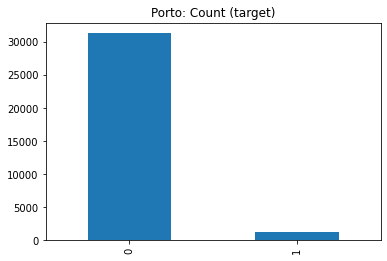

In [5]:
# Imbalance Ratio
pd.Series(data['target']).value_counts().plot(kind='bar',title='Porto: Count (target)')
target_count = data.target.value_counts()
print('Imbalance Ratio:', round((target_count[0] / (target_count[0]+target_count[1]))*100, 2), '%')

## 4. Removing Missing Values

In [7]:
# dealing with missing value

Total = data.isnull().sum().sort_values(ascending=False)
# summarize the amount of missing value in each attributes, and then sort it by descending order
# percent = the counts of missing value /the counts of item (in each attribute)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total,percent],axis=1,keys=['Total','Percent'])
missing_data.head()

,Total,Percent
ps_calc_20_bin,1,0.000031
ps_calc_09,1,0.000031
ps_calc_19_bin,1,0.000031
ps_calc_02,1,0.000031
ps_calc_03,1,0.000031


In [0]:
data = data.dropna()

Standarding the Porto dataset

In [10]:
# Standardising dataset - Porto
data_copy = data.copy()
for col in data_copy.select_dtypes(include='number').columns:
    mms = MinMaxScaler()
    data_copy[col] = mms.fit_transform(data_copy[[col]])
data_copy.describe()

# separate the data in to x and y
data_X = data_copy.drop('target', axis = 1)
data_X=data_X.values
data_Y = np.array(data_copy['target'])
print("data:",data_X)
print(data_X.shape)
print(data_Y.shape)

data: [[0.00000000e+00 2.85714286e-01 6.00000000e-01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [2.45077015e-05 1.42857143e-01 4.00000000e-01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [7.35231046e-05 7.14285714e-01 1.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 ...
 [9.99926477e-01 0.00000000e+00 6.00000000e-01 ... 0.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [9.99938731e-01 1.42857143e-01 4.00000000e-01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.42857143e-01 4.00000000e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
(32558, 58)
(32558,)


## Supervised Learning Phase
### Decision tree Classifier &  Random forest Classifier (cross-validation)

In [13]:
## Decision tree Classifier
#Import library
from sklearn import tree
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

Skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=49)
pred_test_full =0
cv_PrecisionDT =[]
cv_RecallDT =[]
cv_F1scoreDT =[]
cv_ScoreDTROCAUC = []
i=1
for train_index,test_index in Skf.split(data_X,data_Y):
    print('{} of KFold {}'.format(i,Skf.n_splits))
    x_tr,x_v = data_X[train_index],data_X[test_index]
    y_tr,y_v = data_Y[train_index],data_Y[test_index]
    
    #model
    modelDT = tree.DecisionTreeClassifier(criterion = "entropy",random_state=1)
    # model = tree.DecisionTreeClassifier(max_depth=5,max_leaf_nodes=15, max_features=14, criterion = "entropy",random_state=1)
    modelDT.fit(x_tr,y_tr)
    PrecisionDT=precision_score(y_v,modelDT.predict(x_v))
    RecallDT=recall_score(y_v,modelDT.predict(x_v))
    F1scoreDT=f1_score(y_v,modelDT.predict(x_v))
    ScoreDTROCAUC = roc_auc_score(y_v,modelDT.predict(x_v))

    cv_PrecisionDT.append(PrecisionDT)
    cv_RecallDT.append(RecallDT)
    cv_F1scoreDT.append(F1scoreDT)
    cv_ScoreDTROCAUC.append(ScoreDTROCAUC)

    print('Confusion matrix\n',confusion_matrix(y_v,modelDT.predict(x_v)))
    print('Precision:', precision_score(y_v,modelDT.predict(x_v)))
    print('Recall:',recall_score(y_v,modelDT.predict(x_v)))
    print('F1 score:', f1_score(y_v,modelDT.predict(x_v)))
    print('ROC AUC score:',ScoreDTROCAUC)

    i+=1 

1 of KFold 10
Confusion matrix
 [[2993  142]
 [ 112    9]]
Precision: 0.059602649006622516
Recall: 0.0743801652892562
F1 score: 0.0661764705882353
ROC AUC score: 0.5145425547339423
2 of KFold 10
Confusion matrix
 [[3005  130]
 [ 115    6]]
Precision: 0.04411764705882353
Recall: 0.049586776859504134
F1 score: 0.04669260700389105
ROC AUC score: 0.5040597361171525
3 of KFold 10
Confusion matrix
 [[2997  138]
 [ 111   10]]
Precision: 0.06756756756756757
Recall: 0.08264462809917356
F1 score: 0.07434944237918216
ROC AUC score: 0.5193127446715963
4 of KFold 10
Confusion matrix
 [[2971  164]
 [ 112    9]]
Precision: 0.05202312138728324
Recall: 0.0743801652892562
F1 score: 0.06122448979591837
ROC AUC score: 0.5110337828041177
5 of KFold 10
Confusion matrix
 [[2991  144]
 [ 114    7]]
Precision: 0.046357615894039736
Recall: 0.05785123966942149
F1 score: 0.051470588235294115
ROC AUC score: 0.5059591126576773
6 of KFold 10
Confusion matrix
 [[3002  133]
 [ 114    7]]
Precision: 0.05
Recall: 0.0578

In [15]:
from statistics import mean, stdev
print("Mean of Precision:", round(mean(cv_PrecisionDT),7), '\nStandard Deviation of Precision:', round(stdev(cv_percisionDT),7))
print("Mean of Recall:", round(mean(cv_RecallDT),7), '\nStandard Deviation of Recall:', round(stdev(cv_recallDT),7))
print("Mean of F1score:", round(mean(cv_F1scoreDT),7), '\nStandard Deviation of F1score:', round(stdev(cv_F1scoreDT),7))
print("Mean of ROC AUC score:", round(mean(cv_ScoreDTROCAUC),7), '\nStandard Deviation of ROC AUC score:', round(stdev(cv_ScoreDTROCAUC),7))

Mean of Precision: 0.0488866 
Standard Deviation of Precision: 0.0102067
Mean of Recall: 0.0603306 
Standard Deviation of Recall: 0.0146031
Mean of F1score: 0.0539451 
Standard Deviation of F1score: 0.0119697
Mean of ROC AUC score: 0.5076599 
Standard Deviation of ROC AUC score: 0.0065187


In [17]:
## Random forest
from sklearn.ensemble import RandomForestClassifier
cv_PrecisionRF =[]
cv_RecallRF =[]
cv_F1scoreRF =[]
cv_ScoreROCAUCRF = []
i=1
for train_index,test_index in Skf.split(data_X,data_Y):
    print('{} of KFold {}'.format(i,Skf.n_splits))
    x_tr,x_v = data_X[train_index],data_X[test_index]
    y_tr,y_v = data_Y[train_index],data_Y[test_index]
    
    #model
    modelRF = RandomForestClassifier(random_state=1)
    modelRF.fit(x_tr,y_tr)

    PrecisionRF=precision_score(y_v,modelRF.predict(x_v))
    RecallRF=recall_score(y_v,modelRF.predict(x_v))
    F1scoreRF=f1_score(y_v,modelRF.predict(x_v))
    ScoreROCAUCRF = roc_auc_score(y_v,modelRF.predict(x_v))

    cv_PrecisionRF.append(PrecisionRF)
    cv_RecallRF.append(RecallRF)
    cv_F1scoreRF.append(F1scoreRF)
    cv_ScoreROCAUCRF.append(ScoreROCAUCRF)

    print('Confusion Matrix\n',confusion_matrix(y_v,modelRF.predict(x_v)))
    print('Precision:', precision_score(y_v,modelRF.predict(x_v)))
    print('Recall:',recall_score(y_v,modelRF.predict(x_v)))
    print('F1 score:', f1_score(y_v,modelRF.predict(x_v)))
    print('ROC AUC score:',ScoreROCAUCRF)

    i+=1

1 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix
 [[3135    0]
 [ 121    0]]
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 score: 0.0
ROC AUC score: 0.5
2 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix
 [[3135    0]
 [ 121    0]]
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 score: 0.0
ROC AUC score: 0.5
3 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix
 [[3135    0]
 [ 121    0]]
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 score: 0.0
ROC AUC score: 0.5
4 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix
 [[3135    0]
 [ 121    0]]
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 score: 0.0
ROC AUC score: 0.5
5 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix
 [[3135    0]
 [ 121    0]]
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 score: 0.0
ROC AUC score: 0.5
6 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix
 [[3135    0]
 [ 121    0]]
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 score: 0.0
ROC AUC score: 0.5
7 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix
 [[3135    0]
 [ 121    0]]
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 score: 0.0
ROC AUC score: 0.5
8 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix
 [[3135    0]
 [ 121    0]]
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 score: 0.0
ROC AUC score: 0.5
9 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix
 [[3134    0]
 [ 121    0]]
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 score: 0.0
ROC AUC score: 0.5
10 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix
 [[3134    0]
 [ 121    0]]
Precision: 0.0
Recall: 0.0
F1 score: 0.0
ROC AUC score: 0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from statistics import mean, stdev
print("Mean of Precision:", round(mean(cv_PrecisionRF),7), '\nStandard Deviation of percision:', round(stdev(cv_PrecisionRF),7))
print("Mean of Recall:", round(mean(cv_RecallRF),7), '\nStandard Deviation of recall:', round(stdev(cv_RecallRF),7))
print("Mean of F1score:", round(mean(cv_F1scoreRF),7), '\nStandard Deviation of F1score:', round(stdev(cv_F1scoreRF),7))
print("Mean of ROC AUC Score:", round(mean(cv_ScoreROCAUCRF),7), '\nStandard Deviation of Roc score:', round(stdev(cv_ScoreROCAUCRF),7))

Mean of Precision: 0.0 
Standard Deviation of percision: 0.0
Mean of Recall: 0.0 
Standard Deviation of recall: 0.0
Mean of F1score: 0.0 
Standard Deviation of F1score: 0.0
Mean of ROC AUC Score: 0.5 
Standard Deviation of Roc score: 0.0


## Unsupervised Machine Learning Phase

Identifying the number of clusters using the Elbow method and the Silhouette method of heuristics.

1 of KFold 10


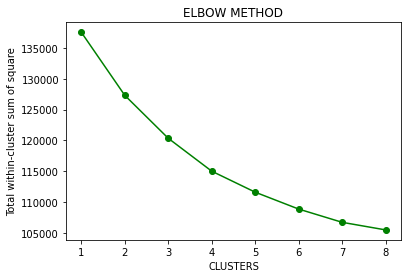

2 of KFold 10


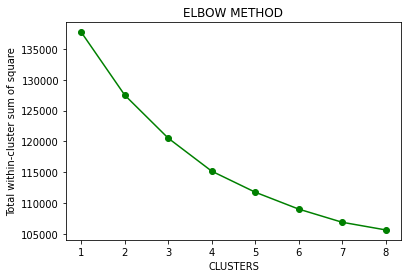

3 of KFold 10


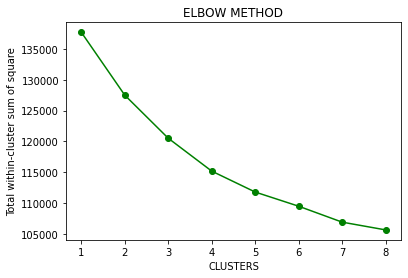

4 of KFold 10


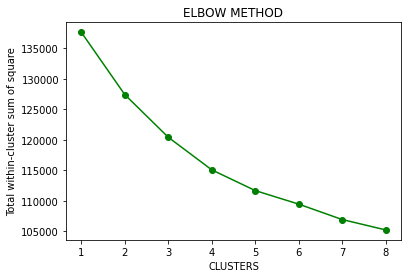

5 of KFold 10


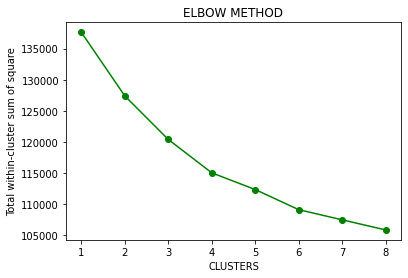

6 of KFold 10


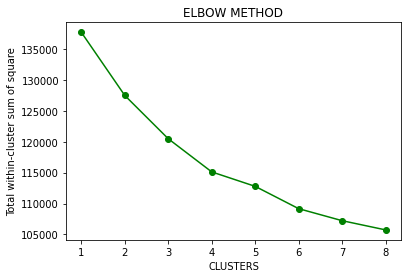

7 of KFold 10


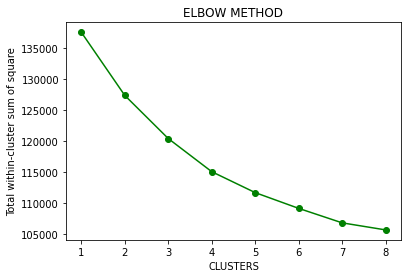

8 of KFold 10


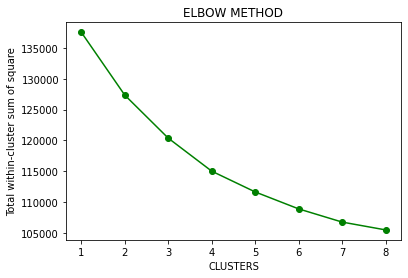

9 of KFold 10


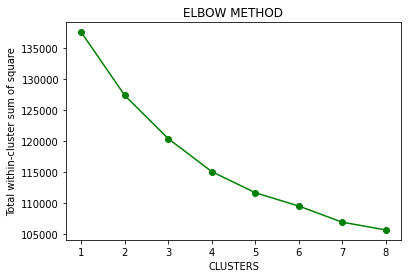

10 of KFold 10


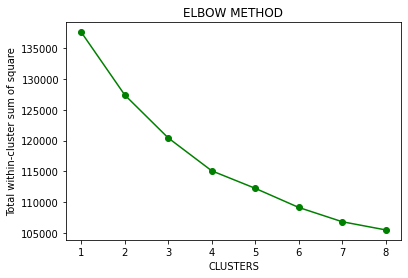

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

Skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=49)
pred_test_full =0
i=1
scoreE1_all=[]
for train_index,test_index in Skf.split(data_X,data_Y):
    print('{} of KFold {}'.format(i,Skf.n_splits))
    x_tr,x_v = data_X[train_index],data_X[test_index]
    y_tr,y_v = data_Y[train_index],data_Y[test_index]

    scoreEl = []
    for cluster in range(1,9):
        kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=49)
        kmeans.fit(x_tr)
        scoreEl.append(kmeans.inertia_)
    scoreE1_all.append(scoreEl)

    # plotting the score

    plt.plot(range(1,9), scoreEl, 'g-o')
    plt.title('ELBOW METHOD')
    plt.xlabel('CLUSTERS')
    plt.ylabel('Total within-cluster sum of square')
    plt.show()
    i+=1
    ## Total within-cluster sum of square: https://www.jamleecute.com/partitional-clustering-kmeans-kmedoid/

In [0]:
## Silhouette score
### Ref_1: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
import matplotlib.cm as cm

silhouette_avg_list = []
n_clusters_list = []
for n_clusters in range(2,9):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x_tr) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=49)
    cluster_labels = clusterer.fit_predict(x_tr)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x_tr, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    silhouette_avg_list += [silhouette_avg]
    n_clusters_list += [n_clusters]
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_tr, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x_tr[:, 2], x_tr[:, 8], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 2], centers[:, 8], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[2], c[8], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 3rd feature")
    ax2.set_ylabel("Feature space for the 9th feature")
    # ax2.set_xlabel("Feature space for the 1st feature")
    # ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [0]:
plt.plot(n_clusters_list, silhouette_avg_list, 'g-o')
plt.title('The Silhouette method')
plt.xlabel('no of clusters')
plt.ylabel('The Silhouette score')
plt.show()
print(silhouette_avg_list)

### 6.2 K-mean method and save the information

In [0]:
## Ref: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=49).fit(x_tr)
kmLabels = kmeans.labels_
Label = [np.count_nonzero(kmLabels==0),np.count_nonzero(kmLabels==1)]
centroids = kmeans.cluster_centers_
print('Label:', Label)
print('Centroids',centroids)

Label: [324790, 210901]
Centroids [[ 5.00125318e-01  3.34926304e-01  4.85275409e-01  4.11125790e-01
   7.67403553e-01  1.99147581e-01  2.43549625e-12  4.23799994e-01
   2.70276178e-01  3.05923828e-01  5.04941655e-04  1.89045229e-03
   1.08223775e-02  1.18846024e-03  3.60155793e-03  5.57842345e-01
   6.50543428e-01  1.30733705e-01  1.56642754e-01  6.84294467e-01
   2.77399072e-01  3.20119401e-01  7.87558371e-01  8.94288617e-01
   2.71227562e-01  1.16413683e-01  4.77128298e-01  4.01372108e-01
   9.49712122e-01  8.20345454e-01  4.50111765e-01  4.97606146e-01
   6.02119338e-01  8.33236861e-01  6.13805885e-01  1.76311380e-01
   7.80893599e-01  8.45538186e-01  4.99409875e-01  4.99797134e-01
   4.99134483e-01  4.74333569e-01  3.14136827e-01  7.69109271e-01
   3.34241270e-01  7.22799963e-01  3.34395851e-01  3.37458789e-01
   2.86436742e-01  1.43971181e-01  2.21075630e-01  3.27699905e-01
   1.22063487e-01  6.28125866e-01  5.54444410e-01  2.87317959e-01
   3.47606146e-01  1.52948059e-01]
 [ 4.99

## Amalgamating Supervised and Unsupervised Learning using Permutation Testing to build a new model to deal with imbalanced data

1 of KFold 10


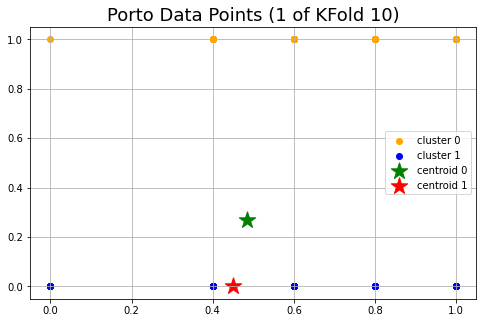

Confusion matrix
 [[1924 1211]
 [  93   28]]
Precision: 0.022598870056497175
Recall: 0.23140495867768596
F1 score: 0.041176470588235294
ROC AUC score: 0.4225605335653183
2 of KFold 10


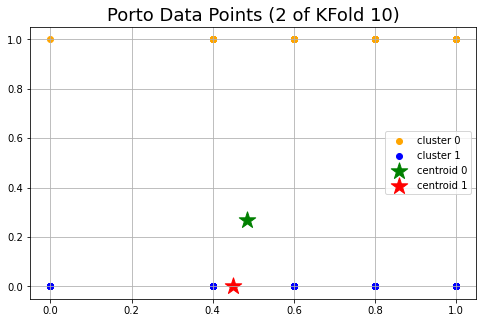

Confusion matrix
 [[1884 1251]
 [  96   25]]
Precision: 0.019592476489028215
Recall: 0.2066115702479339
F1 score: 0.03579098067287044
ROC AUC score: 0.40378425402348855
3 of KFold 10


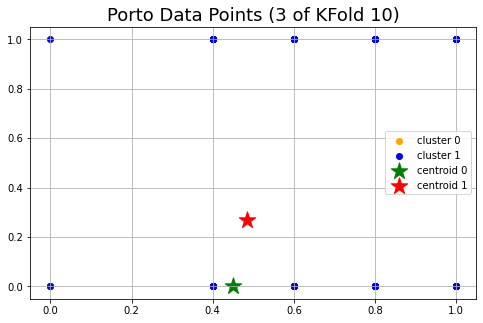

Confusion matrix
 [[1254 1881]
 [  39   82]]
Precision: 0.041772796739684155
Recall: 0.6776859504132231
F1 score: 0.07869481765834932
ROC AUC score: 0.5388429752066116
4 of KFold 10


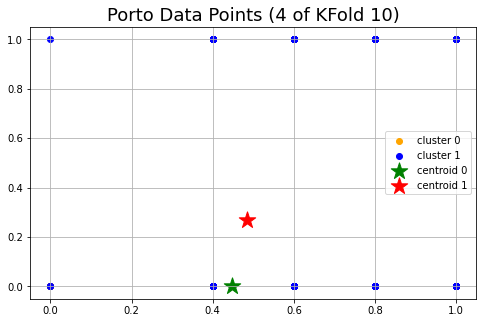

Confusion matrix
 [[1254 1881]
 [  34   87]]
Precision: 0.04420731707317073
Recall: 0.71900826446281
F1 score: 0.0832934418382001
ROC AUC score: 0.559504132231405
5 of KFold 10


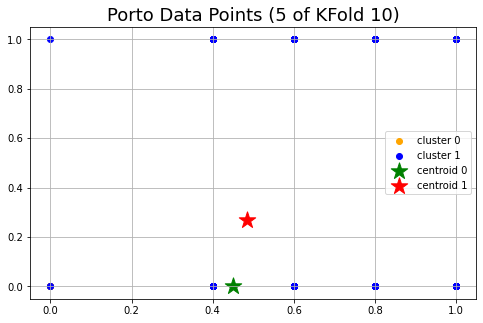

Confusion matrix
 [[1228 1907]
 [  47   74]]
Precision: 0.03735487127713276
Recall: 0.6115702479338843
F1 score: 0.07040913415794481
ROC AUC score: 0.5016383935044222
6 of KFold 10


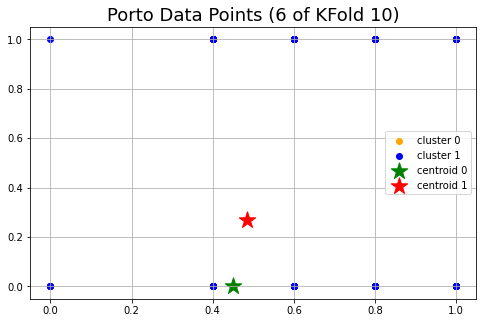

Confusion matrix
 [[1286 1849]
 [  32   89]]
Precision: 0.04592363261093911
Recall: 0.7355371900826446
F1 score: 0.08644973288003885
ROC AUC score: 0.5728722633028853
7 of KFold 10


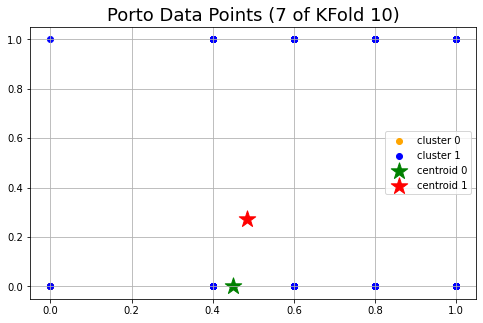

Confusion matrix
 [[1234 1901]
 [  41   80]]
Precision: 0.04038364462392731
Recall: 0.6611570247933884
F1 score: 0.07611798287345385
ROC AUC score: 0.5273887197332173
8 of KFold 10


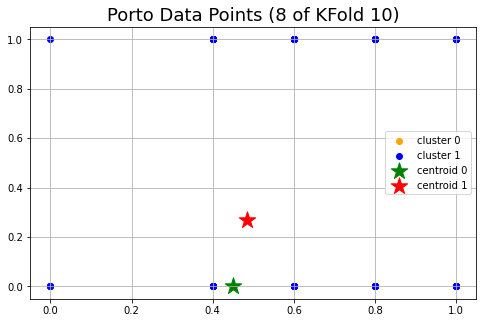

Confusion matrix
 [[1263 1872]
 [  35   86]]
Precision: 0.043922369765066395
Recall: 0.7107438016528925
F1 score: 0.08273208273208274
ROC AUC score: 0.5568073075250108
9 of KFold 10


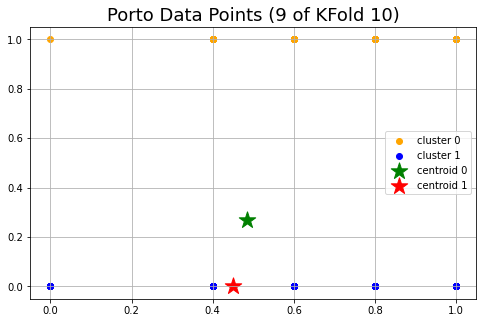

Confusion matrix
 [[1901 1233]
 [  87   34]]
Precision: 0.026835043409629045
Recall: 0.2809917355371901
F1 score: 0.04899135446685879
ROC AUC score: 0.4437824025484291
10 of KFold 10


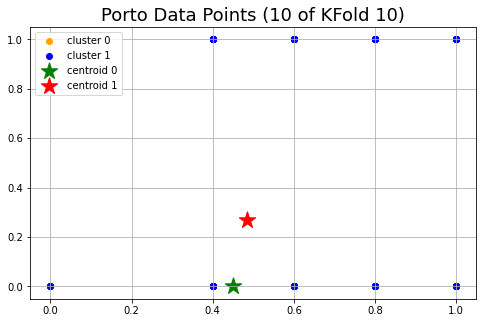

Confusion matrix
 [[1243 1891]
 [  36   85]]
Precision: 0.0430161943319838
Recall: 0.7024793388429752
F1 score: 0.08106819265617549
ROC AUC score: 0.5495485398745827


In [23]:
## Partitioning the datasets into 10 bin keeping intact the original imbalance ratio fro 

Skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=49)
pred_test_full =0
Label_all = []
centroids_all = []

cv_PrecisionRFnew =[]
cv_RecallRFnew =[]
cv_F1scoreRFnew =[]
cv_ScoreROCAUCRFnew = []

ConfusionMatrix_all = []

i=1

## Use different 9 bins in training dataset,
## and remain one to be the testing dataset
for train_index,test_index in Skf.split(data_X,data_Y):
    print('{} of KFold {}'.format(i,Skf.n_splits))
    x_tr,x_v = data_X[train_index],data_X[test_index]
    y_tr,y_v = data_Y[train_index],data_Y[test_index]

    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=2, random_state=49).fit(x_tr)
    kmLabels = kmeans.labels_
    ## save the centroid and the number of samples in each cluster in each 9 bins
    Label = [np.count_nonzero(kmLabels==0),np.count_nonzero(kmLabels==1)]
    Label_all += [Label]
    centroids = kmeans.cluster_centers_
    centroids_all += [centroids]

    ## plot the distribution of samples and the centroids
    plt.figure(figsize=(8,5))
    plt.title("Porto Data Points " "(%d of KFold 10)" %i, fontsize=18)
    plt.grid(True)
    plt.scatter(x_tr[kmeans.labels_ == 0, 2], x_tr[kmeans.labels_ == 0, 8],
                c='orange', label='cluster 0')
    plt.scatter(x_tr[kmeans.labels_ == 1, 2], x_tr[kmeans.labels_ == 1, 8],
                c='blue', label='cluster 1')
    plt.scatter(centroids[0, 2], centroids[0, 8], marker='*', s=300, c='g', label='centroid 0')
    plt.scatter(centroids[1, 2], centroids[1, 8], marker='*', s=300, c='r', label='centroid 1')
    plt.legend()
    plt.savefig('data_Kmean_' + str(i) + 'of K fold 10.png', dpi=300)
    plt.show()

    ## train and test the dataset in random forest model
    modelRFnew = RandomForestClassifier(random_state=42)
    modelRFnew.fit(x_tr,kmLabels)

    PrecisionRFnew=precision_score(y_v,modelRFnew.predict(x_v))
    RecallRFnew=recall_score(y_v,modelRFnew.predict(x_v))
    F1scoreRFnew=f1_score(y_v,modelRFnew.predict(x_v))
    ScoreROCAUCRFnew = roc_auc_score(y_v,modelRFnew.predict(x_v))

    cv_PrecisionRFnew.append(PrecisionRFnew)
    cv_RecallRFnew.append(RecallRFnew)
    cv_F1scoreRFnew.append(F1scoreRFnew)
    cv_ScoreROCAUCRFnew.append(ScoreROCAUCRFnew)

    print('Confusion matrix\n',confusion_matrix(y_v,modelRFnew.predict(x_v)))
    print('Precision:', precision_score(y_v,modelRFnew.predict(x_v)))
    print('Recall:',recall_score(y_v,modelRFnew.predict(x_v)))
    print('F1 score:', f1_score(y_v,modelRFnew.predict(x_v)))
    print('ROC AUC score:',ScoreROCAUCRFnew)
    
    from sklearn.metrics import confusion_matrix    
    ConfusionMatrix = confusion_matrix(y_v, modelRFnew.predict(x_v))
    ConfusionMatrix_all += [ConfusionMatrix]
    i+=1

In [28]:
from statistics import mean, stdev
print("Mean of Precision:", round(mean(cv_PrecisionRFnew),7), '\nStandard Deviation of Precision:', round(stdev(cv_PrecisionRFnew),7))
print("Mean of Recall:", round(mean(cv_RecallRFnew),7), '\nStandard Deviation of Recall:', round(stdev(cv_RecallRFnew),7))
print("Mean of F1score:", round(mean(cv_F1scoreRFnew),7), '\nStandard Deviation of F1score:', round(stdev(cv_F1scoreRFnew),7))
print("Mean of ROC AUC Score:", round(mean(cv_ScoreROCAUCRFnew),7), '\nStandard Deviation of ROC AUC score:', round(stdev(cv_ScoreROCAUCRFnew),7))

Mean of Precision: 0.0365607 
Standard Deviation of Precision: 0.0097858
Mean of Recall: 0.553719 
Standard Deviation of Recall: 0.2201445
Mean of F1score: 0.0684724 
Standard Deviation of F1score: 0.0190444
Mean of ROC AUC Score: 0.507673 
Standard Deviation of ROC AUC score: 0.0620223


# Results Comparison using Box Plots

In [36]:
import plotly.graph_objects as plot

x = ['Precision', 'Precision', 'Precision', 'Precision', 'Precision', 'Precision', 'Precision', 'Precision', 'Precision', 'Precision', 'Precision', 'Precision',
     'Recall', 'Recall', 'Recall', 'Recall', 'Recall', 'Recall', 'Recall', 'Recall', 'Recall', 'Recall', 'Recall', 'Recall',
     'F1 Score', 'F1 Score', 'F1 Score', 'F1 Score', 'F1 Score', 'F1 Score', 'F1 Score', 'F1 Score', 'F1 Score', 'F1 Score', 'F1 Score', 'F1 Score',
     'ROC-AUC Score', 'ROC-AUC Score', 'ROC-AUC Score', 'ROC-AUC Score', 'ROC-AUC Score', 'ROC-AUC Score', 'ROC-AUC Score', 'ROC-AUC Score', 'ROC-AUC Score', 'ROC-AUC Score', 'ROC-AUC Score', 'ROC-AUC Score']

fig = plot.Figure()

fig.add_trace(plot.Box(
    y=cv_PrecisionDT+cv_RecallDT+cv_F1scoreDT+cv_ScoreDTROCAUC,
    x=x,
    name='Decision Tree',
    marker_color='red'
))
fig.add_trace(plot.Box(
    y=cv_PrecisionRF+cv_RecallRF+cv_F1scoreRF+cv_ScoreROCAUCRF,
    x=x,
    name='Random Forest',
    marker_color='green'
))
fig.add_trace(plot.Box(
    y=cv_PrecisionRFnew+cv_RecallRFnew+cv_F1scoreRFnew+cv_ScoreROCAUCRFnew,
    x=x,
    name='New Amalgamation Method',
    marker_color='blue'
))


fig.update_layout(
    yaxis_title='Score',
    boxmode='group' # group together boxes of the different traces for each value of x
)
fig.show()